## Importing Libraries and Analyzing the Dataset

In [71]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn.exceptions
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [42]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.shape)

(150, 5)


In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [46]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

## Data Visualization

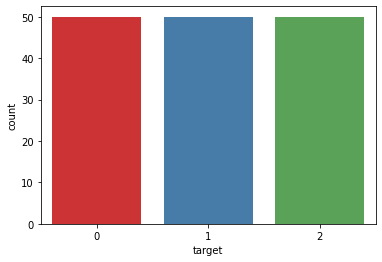

In [47]:
sns.countplot(x='target', data=df, palette='Set1')
plt.show()

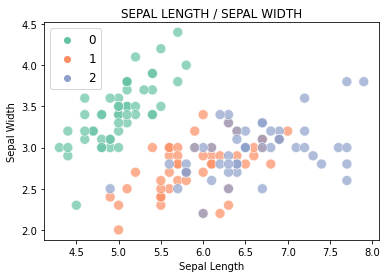

In [93]:
sns.scatterplot(x = 'sepal length (cm)', y ='sepal width (cm)', data = df, hue = 'target', palette = 'Set2', edgecolor = 'w', s = 100, alpha = 0.7)
plt.title('SEPAL LENGTH / SEPAL WIDTH')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

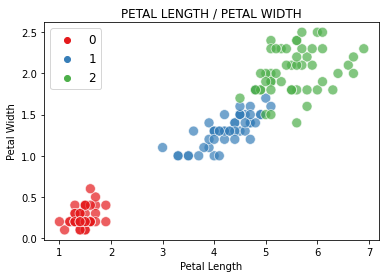

In [95]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = df, hue = 'target', palette = 'Set1', edgecolor = 'w', s = 100, alpha = 0.7)
plt.title('PETAL LENGTH / PETAL WIDTH')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

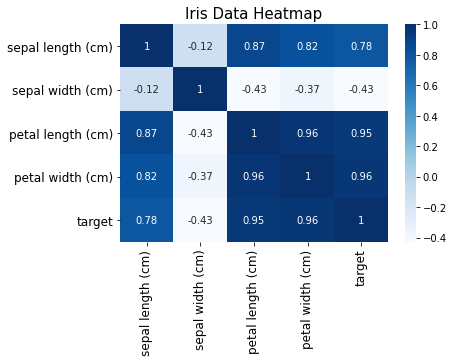

In [62]:
df_corr = df.corr()

sns.heatmap(df_corr, cmap = 'Blues', annot = True, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values)
plt.title('Iris Data Heatmap', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

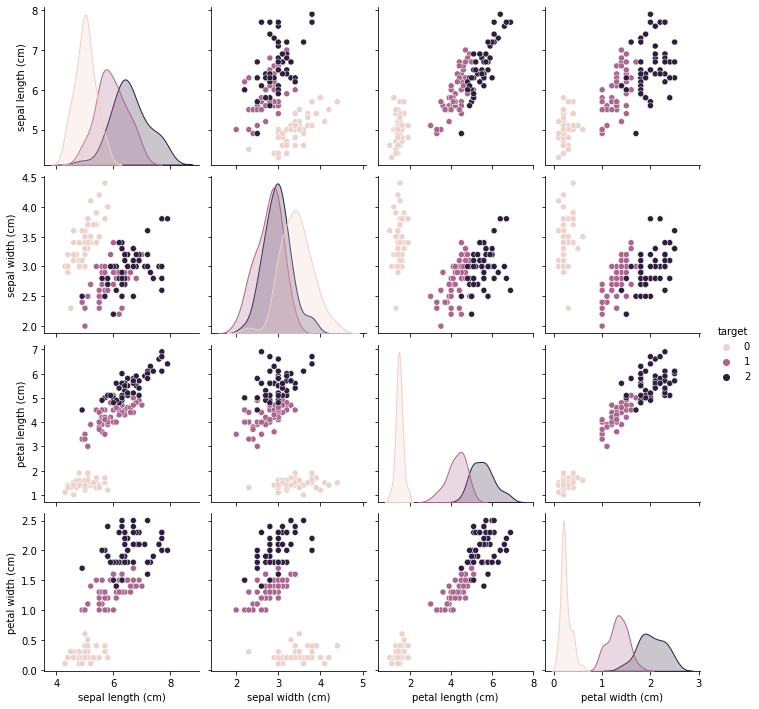

In [63]:
sns.pairplot(data = df, hue = 'target')
plt.show()

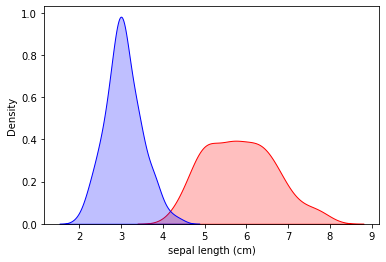

In [64]:
sns.kdeplot(df['sepal length (cm)'], color = 'r', shade = True, label = 'Sepal Length')
sns.kdeplot(df['sepal width (cm)'], color = 'b', shade = True, label = 'Sepal Width')
plt.show()

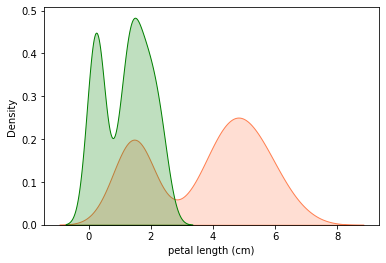

In [65]:
sns.kdeplot(df['petal length (cm)'], color = 'coral', shade = True, label = 'Petal Length')
sns.kdeplot(df['petal width (cm)'], color = 'green', shade = True, label = 'Petal Width')
plt.show()

## Creating training and test sets

In [101]:
# train and test set
#train_x, test_x, train_y, test_y = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=9)
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.2, random_state=9)
print("Train shapes : X = {}, y = {}".format(train_x.shape,train_y.shape))
print("Test shapes : X = {}, y = {}".format(test_x.shape,test_y.shape))

Train shapes : X = (120, 4), y = (120,)
Test shapes : X = (30, 4), y = (30,)


## Models

### Naive Bayes

In [138]:
# training the models
gaussian, multinomial, bernoulli = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)

gaussian.fit(train_x,train_y)
multinomial.fit(train_x,train_y)
bernoulli.fit(train_x,train_y)

y_pred_g = gaussian.predict(test_x)
y_pred_m = multinomial.predict(test_x)
y_pred_b = bernoulli.predict(test_x)

Gaussian
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



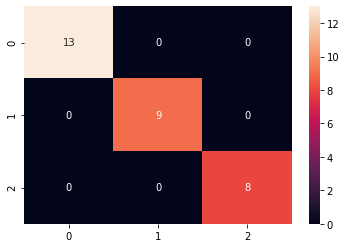

In [103]:
print("Gaussian")
print(classification_report(test_y, y_pred_g))
sns.heatmap(confusion_matrix(test_y, y_pred_g), annot = True)
plt.show()

Multinomial 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



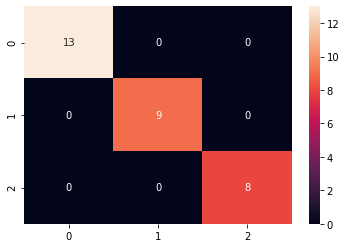

In [104]:
print("Multinomial ")
print(classification_report(test_y, y_pred_m))
sns.heatmap(confusion_matrix(test_y, y_pred_m), annot = True)
plt.show()

Bernoulli
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         9
           2       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



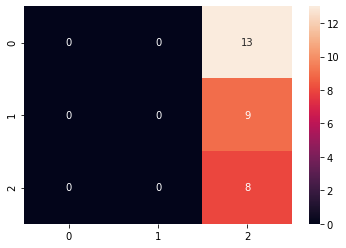

In [105]:
print("Bernoulli")
print(classification_report(test_y, y_pred_b))
sns.heatmap(confusion_matrix(test_y, y_pred_b), annot = True)
plt.show()

### Decision trees

In [106]:
dt = DecisionTreeClassifier(max_depth = 2, random_state=0) 
dt.fit(train_x, train_y)
y_pred_dt = dt.predict(test_x)

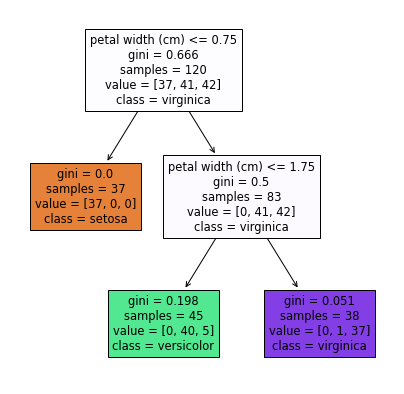

In [107]:
fn = iris.feature_names
cn = list(map(str, list(iris.target_names)))

plt.figure(figsize=(7,7))
tree.plot_tree(dt, feature_names = fn, class_names=cn, filled = True);
plt.show()

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



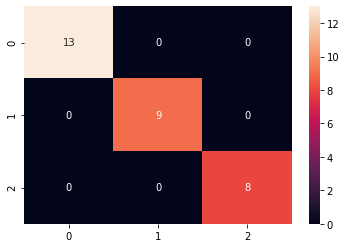

In [108]:
print("Decision Tree")
print(classification_report(test_y, y_pred_dt))
sns.heatmap(confusion_matrix(test_y, y_pred_dt), annot = True)
plt.show()

### K-Nearest Neighbour

In [109]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_x, train_y)
y_pred_neigh = neigh.predict(test_x)

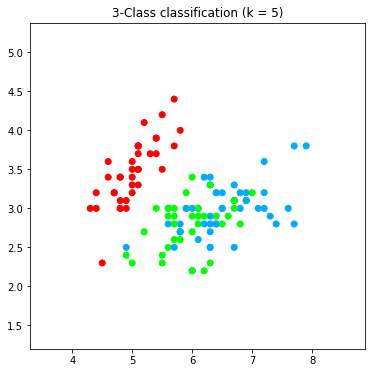

In [143]:
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
np.arange(y_min, y_max, h))


# Plot also the training points
plt.figure(figsize=(6,6))
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-Class classification (k = 5)')
plt.show()

K-Nearest Neighbout
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



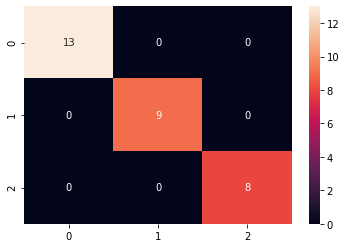

In [110]:
print("K-Nearest Neighbout")
print(classification_report(test_y, y_pred_neigh))
sns.heatmap(confusion_matrix(test_y, y_pred_neigh), annot = True)
plt.show()